In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from aesara import tensor as at
from bokeh.io import output_notebook, show
# from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import pysindy as ps
from pydmd import DMD


In [3]:
def get_trajectory_matrix(trend):
    return np.array([trend[0]['trends']['node_count'][i] for i in range(3)])

In [4]:
# Network topology
N_pop = 200
g = nx.erdos_renyi_graph(N_pop, .3)
N_sim = 1000
# 2° Model selection
models = [ep.SIRModel(g) for i in range(N_sim)]

# 2° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.02)
cfg.add_model_parameter("fraction_infected", 0.1)
[model.set_initial_status(cfg) for model in models]
Nt = 200
trends = []
X = np.zeros((N_sim, 3, Nt))
for i, model in enumerate(models):
    iteration = model.iteration_bunch(Nt)
    
    trends.append(model.build_trends(iteration))
    X[i, :, :] = get_trajectory_matrix(trends[-1])
# 2° Simulation execution




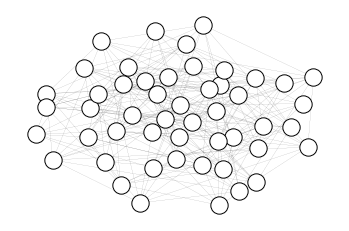

In [20]:
fig, ax = plt.subplots(1)
N_pops = [10, 40]
p_Is = [1.0, .3]
for N, p in zip(N_pops, p_Is):
    illustration_model = nx.erdos_renyi_graph(N, p)
    nx.draw(illustration_model, ax=ax,  width=.1, style='dashed', edge_color='k', node_color='w', edgecolors='k')
    fig.savefig("Erdos_Renyi_Illustration_{pop}_{pER}.eps".format(pop=N, pER=p), format='eps')

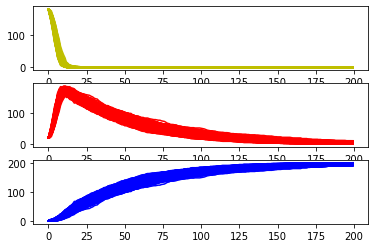

In [ ]:
fig, ax = plt.subplots(3)
for traj in X:
    ax[0].plot(traj[0,:], color='y')
    ax[1].plot(traj[1,:], color='r')
    ax[2].plot(traj[2,:], color='b')
plt.show()

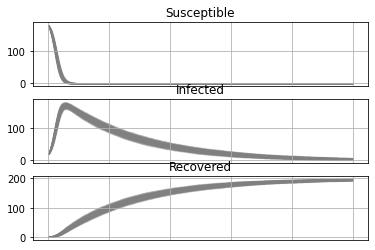

In [61]:
x_grouped = [X[:,i,:] for i in range(3)]
fig, ax = plt.subplots(3)

for ci in np.arange(95, 10, -5):
    for (i, x) in enumerate(x_grouped):
        low = np.percentile(x, 50 - ci / 2, axis=0)
        high = np.percentile(x, 50 + ci / 2, axis=0)
        ax[i].fill_between(np.linspace(0,1,x.shape[1]), low, high, color='gray', alpha= np.exp(-.01*ci))
ax[0].set_title("Susceptible")
ax[1].set_title("Infected")
ax[2].set_title("Recovered")
_ = [x.grid() for x in ax]
_ = [x.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) for x in ax]
_ = [x.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False) for x in ax]
plt.show()

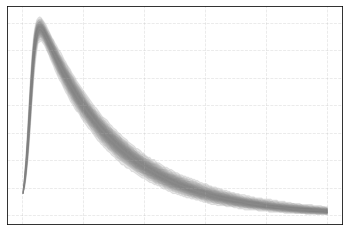

In [90]:
fig, ax = plt.subplots(1)
x = x_grouped[1]
for ci in np.arange(95, 10, -5):
    low = np.percentile(x, 50 - ci / 2, axis=0)
    high = np.percentile(x, 50 + ci / 2, axis=0)
    ax.fill_between(np.linspace(0,1,x.shape[1]), low, high, color='gray', alpha= .3*(1.0-np.exp(-.01*ci)))
ax.grid(linestyle='dashed', alpha=.3)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.show()

In [48]:
t = [*list(range(Nt))]*N_sim
x_grouped[0].shape

(200, 1000)

In [133]:
X_list = [x for x in X]
# for i in range(3):
#     X_2D[i,:] = np.array([X[j,i,:] for j in range(N_sim)]).T.ravel()
# t = np.hstack([np.repeat(i, N_sim) for i in range(Nt)])


In [131]:
X_2D.shape

(3, 200000)

In [137]:
from Quantile_FROLS import Quantile_FROLS
reg_model = ps.SINDy(Quantile_FROLS)

reg_model.fit(X_list, multiple_trajectories=True)

TypeError: MultiOutputMixin._more_tags() missing 1 required positional argument: 'self'

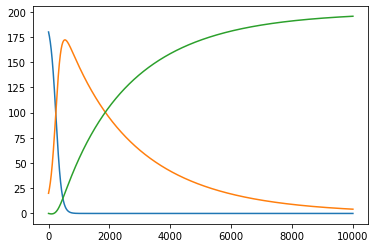

In [ ]:


sim = reg_model.simulate(x0=X_2D[:,Nt], t=np.linspace(0,200, 10000))
plt.plot(sim)